In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df_iris['target'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df_iris.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1, inplace=True)

In [8]:
df_iris.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [13]:
df0 = df_iris[:50]
df1 = df_iris[50:100]
df2 = df_iris[100:]

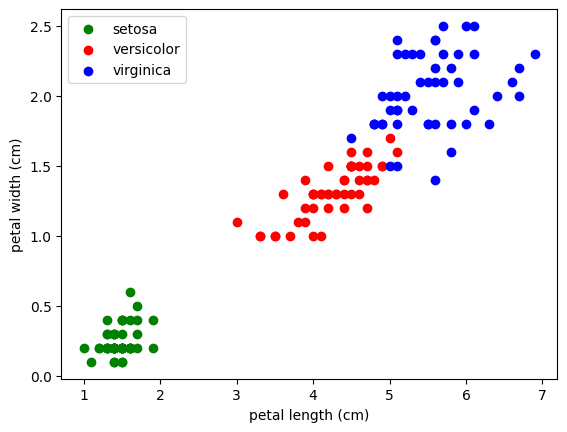

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', label='setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', label='versicolor')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue', label='virginica')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()



In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
from sklearn.model_selection import train_test_split
X = df_iris.drop(['target'], axis=1)
y = df_iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(120, 2)

In [19]:
X_test.shape

(30, 2)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [30]:
knn.score(X_test, y_test)

1.0

In [32]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(58.222222222222214, 0.5, 'Truth')

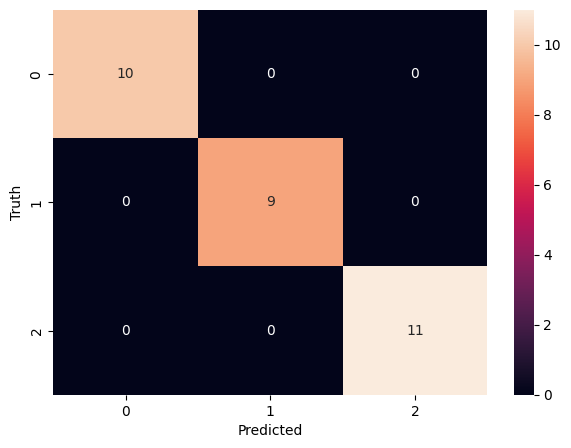

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
from sklearn.datasets import load_digits
digits = load_digits()

In [37]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [49]:
def showDigit(num):
    digits = load_digits()
    plt.gray()
    plt.matshow(digits.images[num])
    plt.show()

<Figure size 640x480 with 0 Axes>

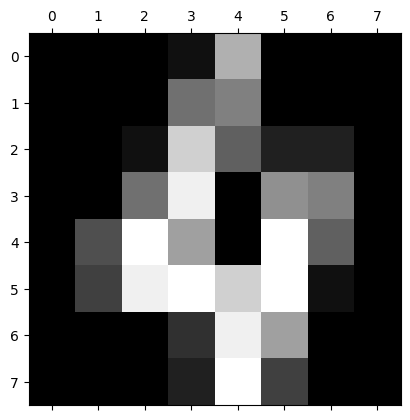

In [50]:
showDigit(4)

<Figure size 640x480 with 0 Axes>

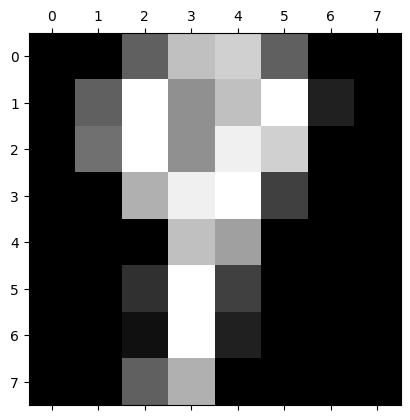

In [54]:
showDigit(69)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1437, 64) (360, 64)
(1437,) (360,)


In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [59]:
knn.score(X_test, y_test)

0.9805555555555555

In [64]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': list(range(0, 10))
},
                   cv=10, return_train_score=False)

clf.fit(digits.data, digits.target)

results = pd.DataFrame(clf.cv_results_)
results

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001977,0.002893,0.000000,0.000000,0,{'n_neighbors': 0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,0.005081,0.003455,0.111324,0.054016,1,{'n_neighbors': 1},0.933333,0.994444,0.972222,0.972222,0.966667,0.983333,0.994444,0.988827,0.977654,0.966480,0.974963,0.017080,2
2,0.003006,0.002554,0.064085,0.038084,2,{'n_neighbors': 2},0.938889,0.988889,0.988889,0.961111,0.961111,0.983333,0.988889,0.977654,0.977654,0.977654,0.974407,0.015348,3
3,0.002126,0.002313,0.058552,0.061184,3,{'n_neighbors': 3},0.938889,1.000000,0.988889,0.972222,0.966667,0.977778,0.983333,0.983240,0.983240,0.972067,0.976633,0.015473,1
4,0.001148,0.000064,0.009998,0.000773,4,{'n_neighbors': 4},0.933333,0.983333,0.983333,0.961111,0.966667,0.983333,0.983333,0.977654,0.983240,0.966480,0.972182,0.015311,4
5,0.001163,0.000040,0.011493,0.003030,5,{'n_neighbors': 5},0.927778,0.983333,0.977778,0.955556,0.972222,0.972222,0.994444,0.983240,0.983240,0.966480,0.971629,0.017814,5
6,0.001126,0.000059,0.009850,0.000182,6,{'n_neighbors': 6},0.927778,0.972222,0.972222,0.955556,0.972222,0.972222,0.988889,0.983240,0.972067,0.966480,0.968290,0.015908,6
7,0.001223,0.000092,0.010778,0.001204,7,{'n_neighbors': 7},0.922222,0.977778,0.977778,0.950000,0.977778,0.961111,0.988889,0.988827,0.972067,0.960894,0.967734,0.019210,7
8,0.001155,0.000054,0.011169,0.003311,8,{'n_neighbors': 8},0.922222,0.977778,0.972222,0.950000,0.966667,0.972222,0.988889,0.977654,0.966480,0.955307,0.964944,0.017754,8
9,0.001136,0.000031,0.010082,0.000171,9,{'n_neighbors': 9},0.916667,0.966667,0.977778,0.950000,0.977778,0.977778,0.983333,0.983240,0.960894,0.955307,0.964944,0.019579,8


In [69]:
results[['param_n_neighbors', 'mean_test_score', 'rank_test_score']]

,param_n_neighbors,mean_test_score,rank_test_score
0,0,NaN,10
1,1,0.974963,2
2,2,0.974407,3
3,3,0.976633,1
4,4,0.972182,4
5,5,0.971629,5
6,6,0.968290,6
7,7,0.967734,7
8,8,0.964944,8
9,9,0.964944,8


In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
knn.score(X_test, y_test)
y_pred = knn.predict(X_test)


In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 37]])

Text(58.222222222222214, 0.5, 'Truth')

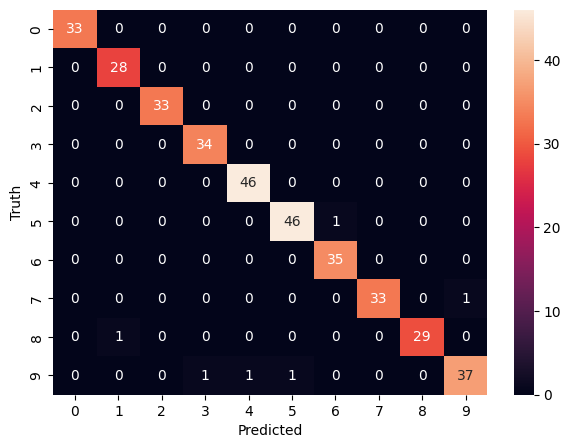

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [75]:
knn.score(X_test, y_test)

0.9833333333333333